# Load the necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from sklearn.impute import SimpleImputer

# Load the dataset

In [2]:
file_path = 'D:\FastAPI_ML_Task\data\global-data-on-sustainable-energy.csv'
df = pd.read_csv(file_path)

#### Clean column names

In [3]:
df.columns = df.columns.str.replace('\n', ' ').str.strip()

### Remove rows with missing values in the target variable

In [4]:
target_col = 'Renewable energy share in the total final energy consumption (%)'
df = df.dropna(subset=[target_col])

### Fill missing values in numerical columns with the median

In [5]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

### Forward fill for any categorical data (in case needed)

In [6]:
df.fillna(method='ffill', inplace=True)

C:\Users\Swemo\AppData\Local\Temp\ipykernel_13304\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [7]:
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                              

In [8]:
df.to_csv('../data/cleaned_energy_data.csv', index=False)

print("Data cleaning complete. Cleaned data saved to 'data/cleaned_energy_data.csv'.")

Data cleaning complete. Cleaned data saved to 'data/cleaned_energy_data.csv'.


In [9]:
# Load the dataset again
df = pd.read_csv('../data/cleaned_energy_data.csv')

# Print column names to check for any inconsistencies
print("Column names in the dataset:")
print(df.columns)


Column names in the dataset:
Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


In [10]:
# Clean the column names by explicitly replacing the newline character using raw string
df.columns = df.columns.str.replace(r'\n', ' ').str.strip()

# Converting the columns to numeric
df['Density (P/Km2)'] = pd.to_numeric(df['Density (P/Km2)'], errors='coerce')
df['Land Area(Km2)'] = pd.to_numeric(df['Land Area(Km2)'], errors='coerce')

# Save the dataset after type conversion
df.to_csv('../data/cleaned_energy_data.csv', index=False)

print("Data type conversion complete. Check data types:")
print(df.dtypes)

Data type conversion complete. Check data types:
Entity                                                               object
Year                                                                float64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energ

In [11]:
print("Column names in the dataset:")
print(df.columns)

Column names in the dataset:
Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density (P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


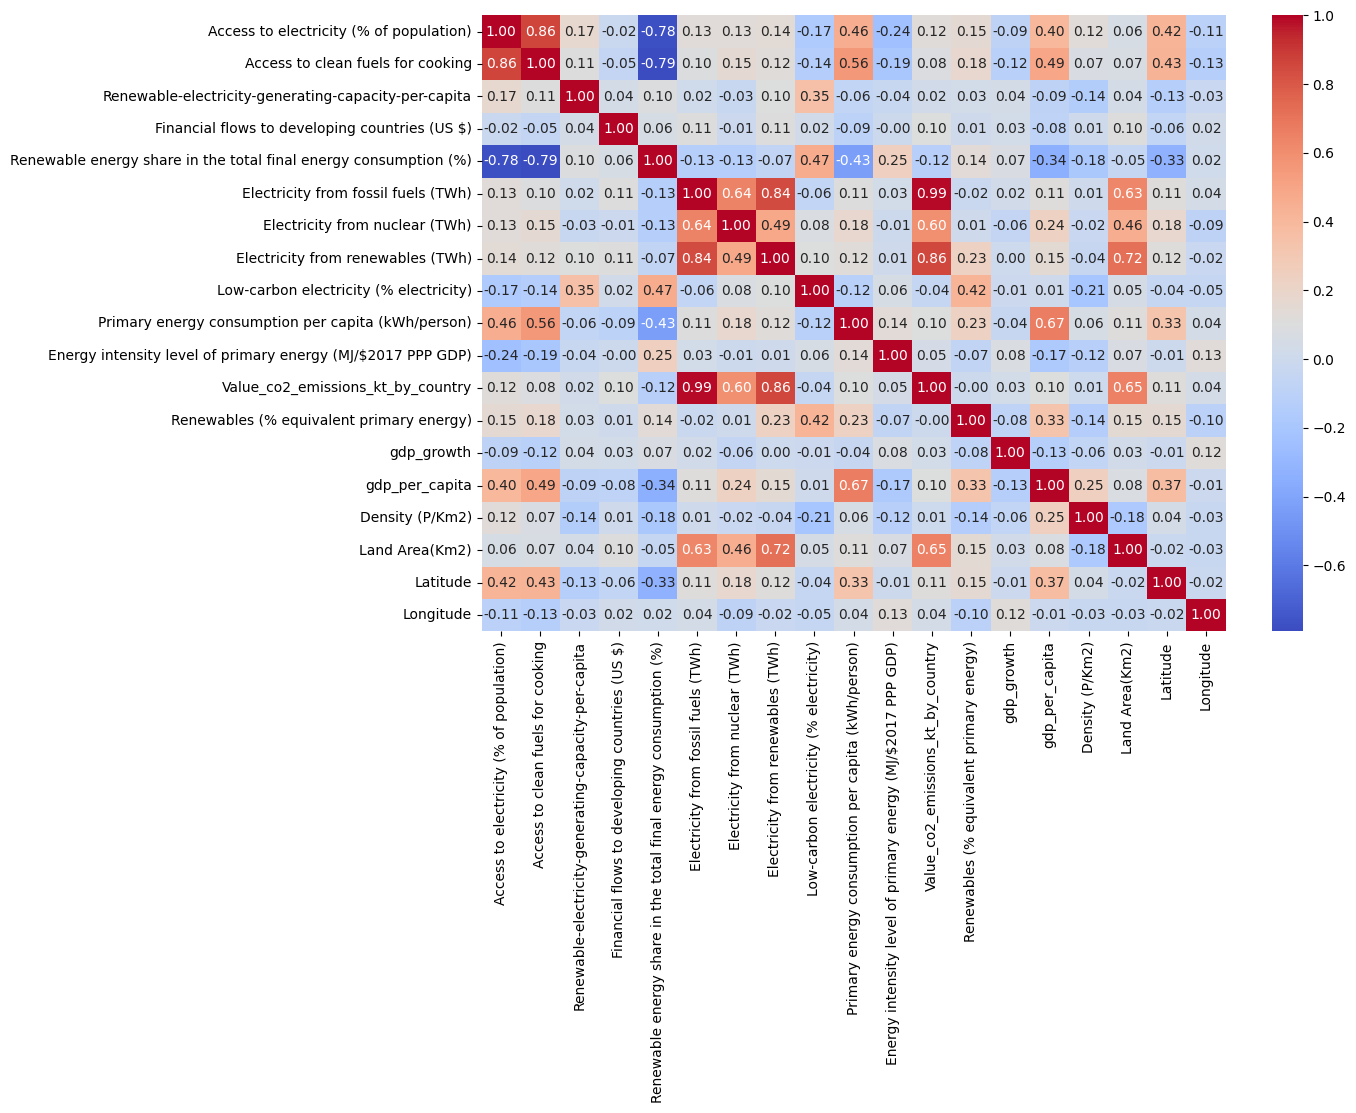

Correlation of features with the target variable:
 Renewable energy share in the total final energy consumption (%)    1.000000
Low-carbon electricity (% electricity)                              0.467946
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.247348
Renewables (% equivalent primary energy)                            0.137794
Renewable-electricity-generating-capacity-per-capita                0.096712
gdp_growth                                                          0.072502
Financial flows to developing countries (US $)                      0.060882
Longitude                                                           0.018278
Land Area(Km2)                                                     -0.045366
Electricity from renewables (TWh)                                  -0.067241
Value_co2_emissions_kt_by_country                                  -0.120957
Electricity from nuclear (TWh)                                     -0.130128
Electricity from fossil f

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reload the cleaned data
df = pd.read_csv('../data/cleaned_energy_data.csv')

# Drop non-numeric columns (like 'Entity' and 'Year')
df_numeric = df.drop(columns=['Entity', 'Year'])

# Calculate the correlation matrix on numeric data only
corr_matrix = df_numeric.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Print the correlation with the target variable
target_col = 'Renewable energy share in the total final energy consumption (%)'
correlations_with_target = corr_matrix[target_col].sort_values(ascending=False)
print("Correlation of features with the target variable:\n", correlations_with_target)

In [14]:
# Print the correlation of each feature with the target variable
target_col = 'Renewable energy share in the total final energy consumption (%)'
correlations_with_target = df_numeric.corr()[target_col].sort_values(ascending=False)
print("Correlation of features with the target variable:\n", correlations_with_target)


Correlation of features with the target variable:
 Renewable energy share in the total final energy consumption (%)    1.000000
Low-carbon electricity (% electricity)                              0.467946
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.247348
Renewables (% equivalent primary energy)                            0.137794
Renewable-electricity-generating-capacity-per-capita                0.096712
gdp_growth                                                          0.072502
Financial flows to developing countries (US $)                      0.060882
Longitude                                                           0.018278
Land Area(Km2)                                                     -0.045366
Electricity from renewables (TWh)                                  -0.067241
Value_co2_emissions_kt_by_country                                  -0.120957
Electricity from nuclear (TWh)                                     -0.130128
Electricity from fossil f

# Model Training

### Split the Data into Training and Test Sets

In [15]:
from sklearn.model_selection import train_test_split

# Define the selected features and target
selected_features = [
    'Low-carbon electricity (% electricity)', 
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 
    'Renewables (% equivalent primary energy)',
    'Primary energy consumption per capita (kWh/person)', 
    'Access to electricity (% of population)', 
    'Access to clean fuels for cooking'
]

X = df_numeric[selected_features]
y = df_numeric[target_col]

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing sets created.")

Training and testing sets created.


## Train the Model

In [16]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBRegressor model
model = XGBRegressor(reg_lambda=1, max_depth=3, learning_rate=0.1, n_estimators=100)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test Set Mean Squared Error: {test_mse}")
print(f"Test Set R² Score: {test_r2}")

Test Set Mean Squared Error: 54.00967385702932
Test Set R² Score: 0.9358899495309518


### Check for Overfitting

In [17]:
# Evaluate the model on the training set
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Set Mean Squared Error: {train_mse}")
print(f"Training Set R² Score: {train_r2}")


Training Set Mean Squared Error: 47.290777810889345
Training Set R² Score: 0.9478138741838005


## Cross-Validation

In [18]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_scores.mean()}")

Cross-Validation R² Scores: [0.81550831 0.7203574  0.85436515 0.88122115 0.75403273]
Mean Cross-Validation R² Score: 0.8050969494196474


# Hyperparameter Tuning

In [19]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],        # Tree depth
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate (step size)
    'n_estimators': [100, 200],    # Number of trees
    'reg_lambda': [0.5, 1, 1.5]    # L2 regularization term
}

# Initialize the model
xgb = XGBRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found by GridSearchCV:", best_params)

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)
test_mse_best = mean_squared_error(y_test, y_pred_best)
test_r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model Test Set Mean Squared Error: {test_mse_best}")
print(f"Best Model Test Set R² Score: {test_r2_best}")


Best parameters found by GridSearchCV: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_lambda': 1}
Best Model Test Set Mean Squared Error: 21.512735167919377
Best Model Test Set R² Score: 0.9744641572731312


<Figure size 1000x600 with 0 Axes>

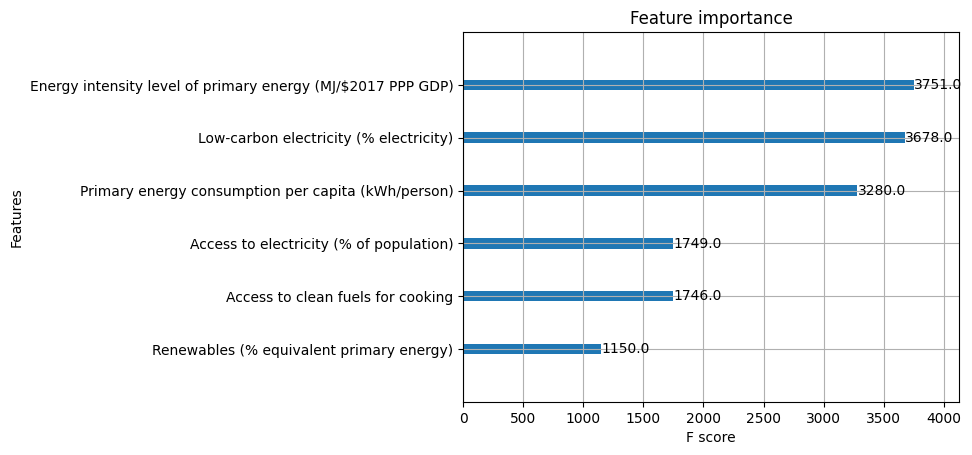

In [20]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance from the best model
plt.figure(figsize=(10, 6))
plot_importance(best_model)
plt.show()

### Cross-Validation

In [21]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the tuned model
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores on Tuned Model: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {cv_scores.mean()}")

Cross-Validation R² Scores on Tuned Model: [0.77525111 0.69330453 0.85084026 0.86897576 0.73034918]
Mean Cross-Validation R² Score: 0.7837441675669978


In [22]:
# Evaluate the tuned model on the training set
y_train_pred_best = best_model.predict(X_train)
train_mse_best = mean_squared_error(y_train, y_train_pred_best)
train_r2_best = r2_score(y_train, y_train_pred_best)

print(f"Best Model Training Set Mean Squared Error: {train_mse_best}")
print(f"Best Model Training Set R² Score: {train_r2_best}")

# Evaluate on the test set
y_pred_best = best_model.predict(X_test)
test_mse_best = mean_squared_error(y_test, y_pred_best)
test_r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model Test Set Mean Squared Error: {test_mse_best}")
print(f"Best Model Test Set R² Score: {test_r2_best}")

Best Model Training Set Mean Squared Error: 0.7806981328386058
Best Model Training Set R² Score: 0.9991384871877619
Best Model Test Set Mean Squared Error: 21.512735167919377
Best Model Test Set R² Score: 0.9744641572731312


## Save the Tuned Model

In [23]:
import pickle

# Save the tuned model
with open('../models/tuned_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Tuned model saved to 'models/tuned_model.pkl'")

Tuned model saved to 'models/tuned_model.pkl'
